In [21]:
import requests
import bs4
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import acquire as a 
import prepare as p

#### Question 1: Spam Data

 - Load the spam data set.
 - Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
 - Is there any overlap in the bigrams for the spam data and the ham data?
 - Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [2]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [3]:
df = pd.read_csv('spam_clean.csv') ## loading the spam vs ham text message set
print(f'The shape of our dataframe: {df.shape}\n')
df.head() ## previewing data frame 

The shape of our dataframe: (5572, 2)



,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.label.value_counts()  ## looking at label value counts

ham     4825
spam     747
Name: label, dtype: int64

In [5]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))  ## making a df of all words

#### Explore Ham

In [6]:
## creating panda's series that contain the frequency for ham spam and all words

ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [7]:
## creating word count dataframe with ham spam and all columns

word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431



#### n-grams
##### bigram: combinations of 2 words

##### Represent text as combinations of 2 words

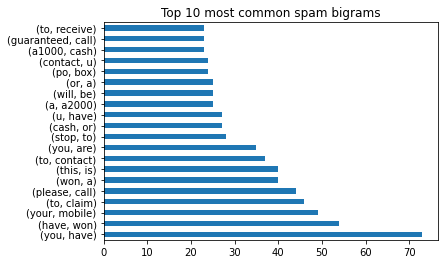

In [23]:
## creating bigrams for spam words and looking at the top 20 

pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(20).plot.barh()
plt.title('Top 10 most common spam bigrams')
plt.show()

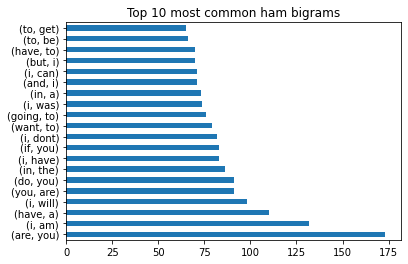

In [22]:
## creating bigrams for ham words and looking at the top 20

pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(20).plot.barh()
plt.title('Top 10 most common ham bigrams')
plt.show()

In [16]:
ham_words[:100] ## looking at first 100 characters in ham words

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore w'

In [17]:
## creating a series for the frequencies of the top 20 ham words

top_20_ham_bigrams = pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(20)

top_20_ham_bigrams.head()

(are, you)    173
(i, am)       132
(have, a)     110
(i, will)      98
(you, are)     91
dtype: int64

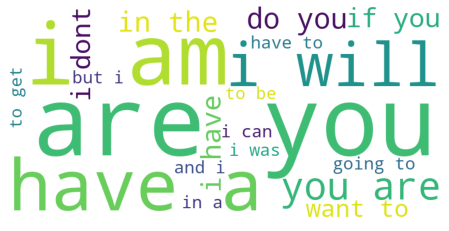

In [18]:
## using list comprehension to creat a dictionary of ham bigrams as a dictionary

data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [19]:
## creating a series for the frequencies of the top 20 spam words

top_20_spam_bigrams = pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(20)

top_20_spam_bigrams.head()

(you, have)       73
(have, won)       54
(your, mobile)    49
(to, claim)       46
(please, call)    44
dtype: int64

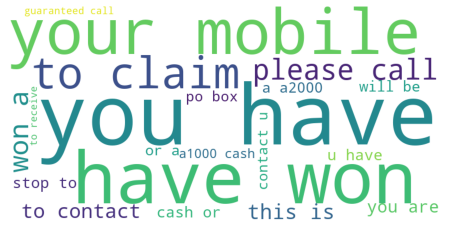

In [20]:
## using list comprehension to creat a dictionary of spam bigrams as a dictionary

data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()


#### n-grams
##### trigram: combinations of 3 words

##### Represent text as combinations of 3 words

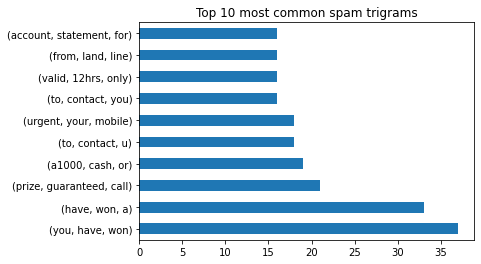

In [13]:
## creating trigrams for spam words and looking at the top 10 

pd.Series(nltk.trigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam trigrams')
plt.show()

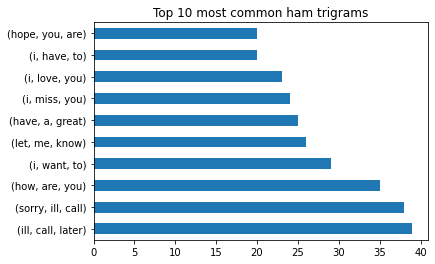

In [14]:
## creating trigrams for spam words and looking at the top 10 

pd.Series(nltk.trigrams(ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common ham trigrams')
plt.show()

#### Explore the blog articles using the techniques discussed in the exploration lesson.